In [104]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
ts = TimeSeries(key='IX5ZSV7I3UUZ3I5B', output_format='csv')

In [125]:
data_reader, _ = ts.get_intraday_extended('SPY', interval='30min', slice='year1month2')

In [126]:
df = pd.DataFrame(data_reader)
df, df.columns = df[1:] , df.iloc[0]

In [127]:
df['time'] = pd.to_datetime(df['time'])
for c in ['open','high','low','close','volume']:
    df[c] = pd.to_numeric(df[c])

In [128]:
df = df.set_index('time').between_time('09:30:00','16:00:00').sort_index()

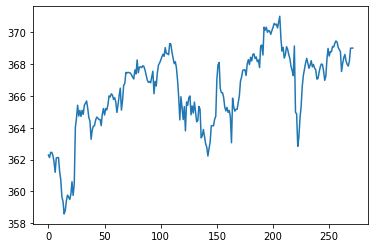

In [129]:
df.reset_index(drop=True)['close'].plot()

In [130]:
df2 = df.copy()
df2['date'] = pd.to_datetime(df2.index.date)

In [131]:
df2

,open,high,low,close,volume,date
time,,,,,,
2020-11-27 09:30:00,362.279532,362.598169,362.279532,362.279532,122465,2020-11-27
2020-11-27 10:00:00,362.289490,362.598169,361.970853,362.127184,4009912,2020-11-27
2020-11-27 10:30:00,362.130172,362.628041,362.050512,362.448808,5079658,2020-11-27
2020-11-27 11:00:00,362.458765,362.588211,362.309404,362.448808,2168106,2020-11-27
2020-11-27 11:30:00,362.428893,362.578254,362.130172,362.249660,2306981,2020-11-27
...,...,...,...,...,...,...
2020-12-24 12:00:00,367.989900,368.150000,367.625000,367.870000,2319877,2020-12-24
2020-12-24 12:30:00,367.880000,368.210000,367.450000,368.190000,2568752,2020-12-24
2020-12-24 13:00:00,368.210000,369.010000,368.160000,368.989900,6807531,2020-12-24


In [132]:
date_range = pd.date_range(df2.index.date.min(), df2.index.date.max())
index = np.arange(1,len(date_range)+1)
date_range_df = pd.DataFrame({
    'date': date_range,
    'day_index': index
})

In [133]:
df2 = df2.reset_index().merge(date_range_df, on='date', how='left')

In [134]:
df2

,time,open,high,low,close,volume,date,day_index
0,2020-11-27 09:30:00,362.279532,362.598169,362.279532,362.279532,122465,2020-11-27,1
1,2020-11-27 10:00:00,362.289490,362.598169,361.970853,362.127184,4009912,2020-11-27,1
2,2020-11-27 10:30:00,362.130172,362.628041,362.050512,362.448808,5079658,2020-11-27,1
3,2020-11-27 11:00:00,362.458765,362.588211,362.309404,362.448808,2168106,2020-11-27,1
4,2020-11-27 11:30:00,362.428893,362.578254,362.130172,362.249660,2306981,2020-11-27,1
...,...,...,...,...,...,...,...,...
267,2020-12-24 12:00:00,367.989900,368.150000,367.625000,367.870000,2319877,2020-12-24,28
268,2020-12-24 12:30:00,367.880000,368.210000,367.450000,368.190000,2568752,2020-12-24,28
269,2020-12-24 13:00:00,368.210000,369.010000,368.160000,368.989900,6807531,2020-12-24,28
270,2020-12-24 13:30:00,368.970000,369.030000,368.970000,369.000000,686475,2020-12-24,28


In [135]:
df2.to_pickle('SPY_year1month2.pkl')

In [136]:
ts = df2.copy()

In [260]:
starting_cash = 50
starting_shares = TRADER_START_AMT / ts.iloc[0]['close']
starting_value = TRADER_START_AMT

In [261]:
strat = init_strategy()

In [262]:
strat = {'inc_trigger_pct': 0.008,
 'inc_trigger_sell_shares_pct': 0.2,
 'dec_trigger_pct': 0.005,
 'dec_trigger_buy_shares_pct': 0.6}

In [263]:
strat

{'inc_trigger_pct': 0.008,
 'inc_trigger_sell_shares_pct': 0.2,
 'dec_trigger_pct': 0.005,
 'dec_trigger_buy_shares_pct': 0.6}

In [264]:
closes_days = ts.iloc[1:-1][['close', 'day_index']].values

In [265]:
cash = starting_cash
shares = starting_shares
value = starting_value

In [266]:
value

100

In [267]:
day_idx_last_buy = 0
num_buys = 0
num_sells = 0
for close, day_idx in closes_days:
    pct_change = (close*shares)/value - 1
    print(day_idx, np.round(close,2), np.round(pct_change,3))
    
    if pct_change >= strat['inc_trigger_pct']:
        print('SELL')
        num_sell_shares = strat['inc_trigger_sell_shares_pct']*shares
        cash += num_sell_shares*close
        shares -= num_sell_shares
        value = shares*close
        
        num_sells += 1
        
        print(f'Shares/Cash: {np.round(shares,4)}/{np.round(cash,2)}')
        print('Total Value:', np.round(shares*close + cash,2))
    
    if pct_change <= -strat['dec_trigger_pct']:
        if day_idx_last_buy < day_idx:
            
            
            num_buy_shares = strat['dec_trigger_buy_shares_pct']*shares
            cash_needed = num_buy_shares*close
            if cash_needed > cash:
                num_buy_shares = cash/close
            
            if np.round(num_buy_shares, 3) == 0:
                continue
            
            print('BUY')
            num_buys += 1
            
            cash -= num_buy_shares*close
            shares += num_buy_shares
            value = shares*close
            
            day_idx_last_buy = day_idx
        
            print(f'Shares/Cash: {np.round(shares,4)}/{np.round(cash,2)}')
            print('Total Value:', np.round(shares*close + cash,2))
            
print(f'# Buys/Sells: {num_buys}/{num_sells}')

1.0 362.13 -0.0
1.0 362.45 0.0
1.0 362.45 0.0
1.0 362.25 -0.0
1.0 361.86 -0.001
1.0 361.2 -0.003
1.0 362.1 -0.0
1.0 362.12 -0.0
1.0 362.12 -0.0
4.0 361.24 -0.003
4.0 360.73 -0.004
4.0 359.66 -0.007
BUY
Shares/Cash: 0.415/0.0
Total Value: 149.28
4.0 359.36 -0.001
4.0 358.59 -0.003
4.0 358.8 -0.002
4.0 359.41 -0.001
4.0 359.77 0.0
4.0 359.64 -0.0
4.0 359.49 -0.0
4.0 359.83 0.0
4.0 360.61 0.003
4.0 359.75 0.0
4.0 360.46 0.002
5.0 364.02 0.012
SELL
Shares/Cash: 0.332/30.22
Total Value: 151.09
5.0 364.61 0.002
5.0 365.41 0.004
5.0 364.73 0.002
5.0 365.09 0.003
5.0 364.71 0.002
5.0 365.09 0.003
5.0 364.84 0.002
5.0 365.41 0.004
5.0 365.55 0.004
5.0 365.68 0.005
5.0 365.21 0.003
5.0 364.64 0.002
5.0 364.41 0.001
6.0 363.28 -0.002
6.0 363.85 -0.0
6.0 364.1 0.0
6.0 364.12 0.0
6.0 364.47 0.001
6.0 364.67 0.002
6.0 364.59 0.002
6.0 364.51 0.001
6.0 364.52 0.001
6.0 364.13 0.0
6.0 364.85 0.002
6.0 365.21 0.003
6.0 364.8 0.002
6.0 365.2 0.003
7.0 365.12 0.003
7.0 365.45 0.004
7.0 366.0 0.005
7.0 36

In [259]:
ending_value = (shares * ts.iloc[-1]['close']) + cash
roi = ending_value/(starting_value+starting_cash) - 1
ending_value, roi

(153.64160874322326, 0.024277391621488453)

In [215]:
ending_value = ts.iloc[-1]['close'] * ((starting_value+starting_cash) / ts.iloc[0]['close'])
roi = ending_value/(starting_value+starting_cash) - 1
ending_value, roi

(152.78257550672734, 0.018550503378182315)

In [268]:
0.024277391621-0.01855050337

0.0057268882510000015

In [184]:
TRADER_START_AMT = 100
POP_SIZE = 50
EPOCHS = 100

In [150]:
def init_strategy():
    strat = {
        'inc_trigger_pct': np.random.uniform(low=0.01, high=0.1),
        'inc_trigger_sell_shares_pct': np.random.uniform(low=0.01, high=0.1),
        'dec_trigger_pct': np.random.uniform(low=0.01, high=0.1),
        'dec_trigger_buy_shares_pct': np.random.uniform(low=0.01, high=0.1),
    }
    for k in strat.keys():
        strat[k] = np.round(strat[k],4)
    
    return strat

In [88]:
traders = [ init_strategy() for _ in range(POP_SIZE) ]

In [86]:
def fitness(trader, ts):
    # extract strategy
    # run strategy over time series
    # calculate ending value
    
    pass

In [109]:
def breed(traders):
    # assume traders are sorted
    new_traders = deepcopy(traders)
    
    while True:
        mom_idx = np.random.choice(len(traders))
        dad_idx = np.random.choice(len(traders))
        
        if mom_idx == dad_idx:
            continue
        
        mom = traders[mom_idx]
        dad = traders[dad_idx]
        
        child = dict()
        for prop in mom.keys():
            if np.random.rand() < 0.5:
                if np.random.rand() < 0.5:
                    child[prop] = mom[prop]
                else:
                    child[prop] = dad[prop]
            else:
                child[prop] = (dad[prop] + mom[prop])/2
                
        new_traders.append(child)
        
        if len(new_traders) == POP_SIZE:
            break
            
    return new_traders

In [99]:
def mutate(traders):
    for trader in traders:
        if np.random.rand() < 0.75:
            rand_idx = np.random.choice(len(trader.keys()))
            strat_prop = trader.keys()[rand_idx]
            
            if strat_prop.endswith('shares'):
                trader[strat_prop] = max(trader[strat_prop] + np.random.normal(0.0, 1.0), 0.001)
                
            if strat_prop.endswith('pct'):
                trader[strat_prop] = np.clip(trader[strat_prop] + np.random.normal(0.0, 1.0), a_min=0.001, a_max=0.999)
    
    return traders

In [100]:
def select(traders):
    scores = [ (trader, fitness(trader)) for trader in traders ]
    scores = sorted(scores, key=lambda x: -x[1])[:int(len(scores)/3)]
    
    return scores